"""
- Data preparation
- vanilla network X
    - train on 100% of cifar10
        - save result to cifar/models/vanilla_cifar10.h5
- build_siamese_vanilla_model
    - train on 100% of cifar10
        - save result to cifar/models/siamese_vanilla_cifar10_diff.h5
"""

In [1]:
%config Completer.use_jedi = False

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random
from utils import *
from sklearn.metrics import accuracy_score, confusion_matrix

2024-06-13 20:12:10.083130: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-13 20:12:10.123812: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-13 20:12:10.648707: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# import the necessary packages
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# Data preparation

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [5]:
train_images.shape

(50000, 32, 32, 3)

In [6]:
test_images.shape

(10000, 32, 32, 3)

In [7]:
train_images.astype('float32') 
test_images.astype('float32') 

train_images = train_images/255.
test_images = test_images/255.

In [8]:
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

# Vanilla network

In [10]:
def build_vanilla_model(shape, class_num):
    # specify the inputs for the feature extractor network
    inputs = Input(shape)

    x = Conv2D(32, (3, 3), activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(64, (2, 2), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    
    x = Conv2D(128, (2, 2), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2,2))(x)
    x = Dropout(0.2)(x)
    
    x = Flatten()(x)

    x = Dense(32, activation='relu')(x)
    x = Dropout(0.2)(x)
    
    outputs = Dense(class_num, activation='softmax')(x)

    # build the model
    model = Model(inputs, outputs)
    
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

### model on the whole dataset

learning

2024-04-28 16:53:06.043402: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1365 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/200


I0000 00:00:1714315987.538078  108931 service.cc:145] XLA service 0x75dc1401d9a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714315987.538113  108931 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-04-28 16:53:07.560650: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-28 16:53:07.664479: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


21/98 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1143 - loss: 2.2958

I0000 00:00:1714315991.495352  108931 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


91/98 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1737 - loss: 2.1860

I0000 00:00:1714315993.445079  109040 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_1628', 4 bytes spill stores, 4 bytes spill loads



98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1783 - loss: 2.1759

I0000 00:00:1714315996.053135  109103 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'triton_gemm_dot_93', 8 bytes spill stores, 8 bytes spill loads



98/98 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.1790 - loss: 2.1745 - val_accuracy: 0.3928 - val_loss: 1.7302
Epoch 2/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.3599 - loss: 1.7369 - val_accuracy: 0.4641 - val_loss: 1.5091
Epoch 3/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4261 - loss: 1.5749 - val_accuracy: 0.4960 - val_loss: 1.4499
Epoch 4/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4595 - loss: 1.4881 - val_accuracy: 0.5365 - val_loss: 1.3110
Epoch 5/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4949 - loss: 1.4043 - val_accuracy: 0.5564 - val_loss: 1.2550
Epoch 6/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5174 - loss: 1.3529 - val_accuracy: 0.5736 - val_loss: 1.2076
Epoch 7/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5245 - loss: 1.3201 - val_accuracy: 0.5741 - val_loss: 1.2140
Epoch 8/200
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5371 - loss: 1.2895 - val_accuracy: 0.6038 - val_loss: 1

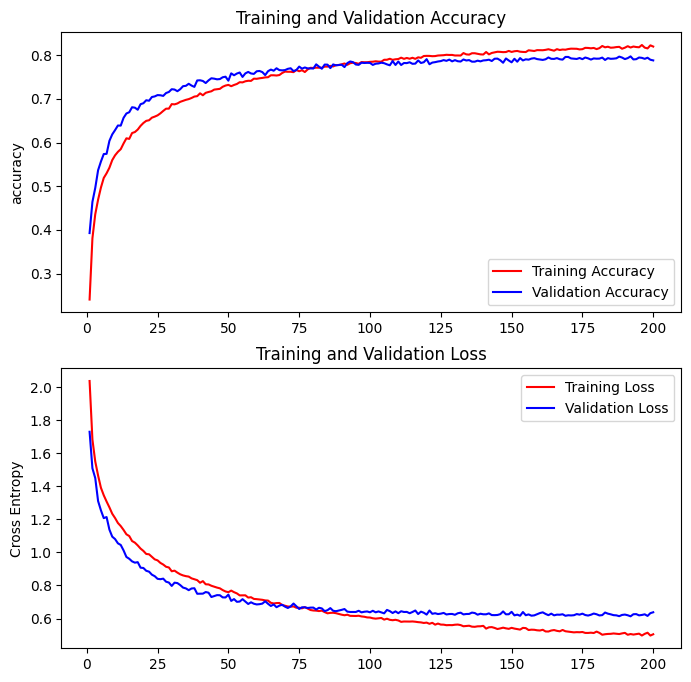

In [11]:
model = build_vanilla_model(train_images[0].shape, 10)
history = model.fit(train_images, train_labels_cat, epochs=200, batch_size=512, 
                    validation_data=(test_images, test_labels_cat))
print_history_chart(history)
model.save('cifar/models/vanilla_cifar10.h5')

evaluation

In [24]:
model = tf.keras.models.load_model("cifar/models/vanilla_cifar10.h5")

In [25]:
results = full_evaluate_differencing(model, test_images, test_labels) #id7

I0000 00:00:1714340338.384728    6804 service.cc:145] XLA service 0x7c1f98005cd0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1714340338.384756    6804 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-04-28 23:38:58.402425: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-28 23:38:58.490275: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


297/313 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step

I0000 00:00:1714340339.034293    6804 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.9263900000000002
Confusion matrix:
 [[8636  372]
 [ 323  669]]
F1-score: 0.6581406787998033


# Siemese network

### From classification

In [11]:
def full_evaluate_differencing(model, X, y, siamese=False):
    results = {}
    if siamese:
        y_pred = np.argmax(model.predict([X, X]), 1)
    else:
        y_pred = np.argmax(model.predict(X), 1)
    acc = 0
    c_m = None
    flag = True

    for i in range(1,11):
        true_sim = (y == np.concatenate([y[i:], y[:i]])).reshape(-1)
        pred_sim = (y_pred == np.concatenate([y_pred[i:], y_pred[:i]]))
        acc += accuracy_score(true_sim, pred_sim)
        if flag:
            c_m = confusion_matrix(true_sim, pred_sim)
        else:
            c_m += confusion_matrix(true_sim, pred_sim)

    acc = acc/10
    results['accuracy_score'] = acc
    print('Accuracy:', acc)
    results['confusion_matrix'] = c_m
    print('Confusion matrix:\n', c_m)
    
    def f1(mat):
        tp = mat[1][1] 
        fp = mat[0][1] 
        fn = mat[1][0] 
        tn = mat[0][0] 
        prec, rec = tp/(tp+fp), tp/(tp+fn)
        return 2*prec*rec/(prec+rec)
    
    results['f1_score'] = f1(c_m)
    print('F1-score:', f1(c_m))
    return results


model = tf.keras.models.load_model("cifar/models/siamese_vanilla_cifar10.h5")
results = full_evaluate_differencing(model, test_images, test_labels, siamese=True) #id8

I0000 00:00:1718302518.084315  395538 service.cc:145] XLA service 0x737ed40092c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1718302518.084349  395538 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-06-13 20:15:18.089545: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-06-13 20:15:18.132079: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


158/313 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step

I0000 00:00:1718302518.453008  395538 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.93334
Confusion matrix:
 [[8666  342]
 [ 321  671]]
F1-score: 0.6693266832917706


#### Custom

In [45]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Lambda
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow.keras.backend as K


def build_siamese_model(inputShape):
    inputs = Input(inputShape)

    x = Conv2D(32, (3, 3), activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)

    x = Conv2D(64, (3, 3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)
    
    x = Conv2D(128, (3, 3), activation="relu")(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Dropout(0.2)(x)

#     pooledOutput = GlobalAveragePooling2D()(x)
    pooledOutput = Flatten()(x)
    outputs = Dense(32)(pooledOutput)
    

    model = Model(inputs, outputs)

    return model


def euclidean_distance(vectors):
	# unpack the vectors into separate lists
	(featsA, featsB) = vectors

	# compute the sum of squared distances between the vectors
	sumSquared = K.sum(K.square(featsA - featsB), axis=1,
		keepdims=True)

	# return the euclidean distance between the vectors
	return K.sqrt(K.maximum(sumSquared, K.epsilon()))


In [46]:
y_tst = (test_labels == np.concatenate([test_labels[1:], test_labels[:1]])).reshape(-1)

### model on the whole datasets

learning

In [47]:
def build_siamese_vanilla_model(shape, class_num):
    inputs1 = Input(shape)
    inputs2 = Input(shape)
    
    def one_side(inputs):
        x = Conv2D(32, (3, 3), activation="relu")(inputs)
        x = MaxPooling2D(pool_size=(2, 2))(x)

        x = Conv2D(64, (2, 2), activation="relu")(x)
        x = MaxPooling2D(pool_size=(2,2))(x)
        x = Dropout(0.2)(x)

        x = Conv2D(128, (2, 2), activation="relu")(x)
        x = MaxPooling2D(pool_size=(2,2))(x)
        x = Dropout(0.2)(x)

        x = Flatten()(x)

        x = Dense(32, activation='relu')(x)
        x = Dropout(0.2)(x)
        
        return x
    
    x1 = one_side(inputs1)
    x2 = one_side(inputs2)
    
    x = concatenate([x1, x2])
    
    outputs = Dense(class_num, activation='softmax')(x)

    # build the model
    model = Model([inputs1, inputs2], outputs)
    
    model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

    return model

In [48]:
model = build_siamese_vanilla_model(train_images[0].shape,10)

In [49]:
adam = tf.keras.optimizers.Adam(
    learning_rate=0.05,
)

model.compile(optimizer=adam,
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC()])

In [50]:
a, b = 1, 2

X1 = np.concatenate([train_images,train_images])
X2 = np.concatenate([np.concatenate([train_images[a:], train_images[:a]]),
                    np.concatenate([train_images[b:], train_images[:b]])])

# y = to_categorical(y)


y1 = (train_labels == np.concatenate([train_labels[a:], train_labels[:a]])).reshape(-1)
y2 = (train_labels == np.concatenate([train_labels[b:], train_labels[:b]])).reshape(-1)
y = np.concatenate([y1, y2])

In [51]:
history = model.fit([X1, X2], y, epochs=500, batch_size=512, shuffle=True, class_weight={0:1, 1:2},
         validation_data=([test_images, np.concatenate([test_images[1:], test_images[:1]])], y_tst))


2024-04-28 23:42:53.186836: W external/local_tsl/tsl/framework/bfc_allocator.cc:487] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.14GiB (rounded to 1228800000)requested by op _EagerConst
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2024-04-28 23:42:53.186958: I external/local_tsl/tsl/framework/bfc_allocator.cc:1044] BFCAllocator dump for GPU_0_bfc
2024-04-28 23:42:53.187277: I external/local_tsl/tsl/framework/bfc_allocator.cc:1051] Bin (256): 	Total Chunks: 104, Chunks in use: 104. 26.0KiB allocated for chunks. 26.0KiB in use in bin. 6.6KiB client-requested in use in bin.
2024-04-28 23:42:53.187325: I external/local_tsl/tsl/framework/bfc_allocator.cc:1051] Bin (512): 	Total Chunks: 14, Chunks in use: 12. 7.2KiB allocated for chunks. 6.2KiB in use in bin. 6.0KiB client-requested in use in bin.
2024-04-28 23:42:53

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
print_history_chart(history)

NameError: name 'print_history_chart' is not defined

In [ ]:
model.save('cifar/models/siamese_vanilla_cifar10_diff.h5')

retrain

In [ ]:
# !for i in {200..250}; do python retrain_cifar_10.py $i; done

evaluate

In [ ]:
model = tf.keras.models.load_model("cifar/models/siamese_vanilla_cifar10_diff.h5")


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'siamese_vanilla_cifar10_diff.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 32)           109664      input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 1)            0           model[0][0]                

In [ ]:
y_pred = model.predict([test_images, np.concatenate([test_images[1:], test_images[:1]])])

In [ ]:
accuracy_score(y_tst, y_pred>0.5)

0.93

In [ ]:
confusion_matrix(y_tst, y_pred>0.5) #id9

array([[8647,  361],
       [ 339,  653]])

In [ ]:
f1_score(y_tst, y_pred>0.5)

0.6510468594217348